<p>
<div style="text-align: justify">
    In <i>Synechocystis sp. PCC 6803</i>, squalene production is achieved through sesquiterpenoid and triterpenoid biosynthesis pathway which uses farnesyl diphosphate (FPP) as a main precursor. Generation of the precursor, FPP, can be derived through two different pathways, mevalonate (MVA) and methylerythritol 4-phosphate (MEP) pathways. However, ccording to the genome analysis, <i>Synechocystis sp. PCC 6803</i> does not possess the enzymetic reactions required for the MVA pathway, thus making MEP pathway the main flux stream towards squalene biosynthesis. Heterologous expression of MVA pathway reactions can provide an additional side-stream beside the MEP pathway, thus increasing the flux towards the squalene production as illustrated in <i>Figure x</i>. In addition, incorporation of the MVA pathway also enables the utilizaiton of acetyl-CoA as an alternative substrate besides glyceraldehyde-3-phosphate which is used in MEP pathway. Implementation of MVA and MEP coupling is already shown to be an effective strategy for increasing flux towards isopehtenyl-diphosphate (IPP) and deimethylallyl-diphosphate (DMAPP) in <i>Synechocystis sp. PCC 6803</i>, which act as a precursor for squalene production [X].
    </div>
    </p>

<div class="csl-entry">
    [X] Bentley, F. K., Zurbriggen, A., &#38; Melis, A. (2014). Heterologous expression of the mevalonic acid pathway in cyanobacteria enhances endogenous carbon partitioning to isoprene. <i>Molecular Plant</i>, <i>7</i>(1), 71–86. https://doi.org/10.1093/
</div>

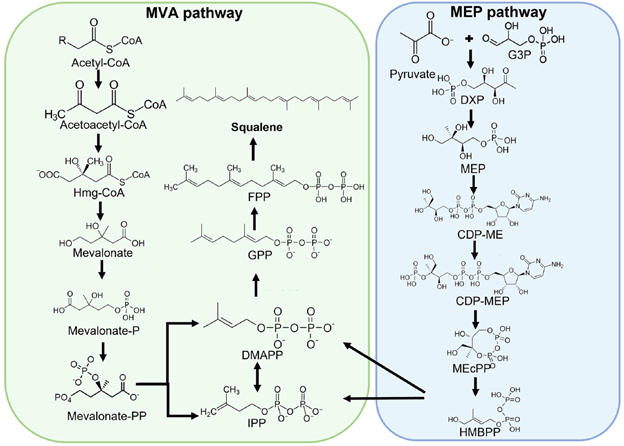

<div class="csl-entry">
    [X] Paramasivan, K., &#38; Sarma Mutturi, ·. (2022). Recent advances in the microbial production of squalene. <i>World Journal of Microbiology and Biotechnology</i>, <i>38</i>, 91–92. https://doi.org/10.1007/
</div>

In [1]:
# Required packes
import cobra
from cobra import Model, Reaction, Metabolite
from cobra.io import read_sbml_model

# Input model
modelM=read_sbml_model('iJN678mod.xml')
modelMVA=read_sbml_model('iJN678mm.xml')

In [2]:
#Setting medium for autotrophic (CO2 as carbon source)

co2KO=modelM.reactions.get_by_id("EX_co2_e")
photonKO=modelM.reactions.get_by_id("EX_photon_e")
hco3KO=modelM.reactions.get_by_id("EX_hco3_e")

co2KO.bounds=(-3.7,1000.0)
hco3KO.bounds= (-3.7,1000.0)
photonKO.bounds= (-100,0)

mediumAuto = modelM.medium
mediumAuto["EX_glc__D_e"] = 0.0
mediumAuto["EX_hco3_e"] = 0.0
mediumAuto["EX_photon_e"]=54.5
mediumAuto["EX_co2_e"]=3.7
modelM.medium = mediumAuto

# Define the objective as squalene production for modelM (model without MVA reactions)
modelM.objective="EX_sql_e"
modelM.optimize().objective_value

sql_productionM = modelM.optimize().objective_value
maximum_yieldM = sql_productionM / (-1*(modelM.reactions.EX_co2_e.flux))

# Define the objective as squalene production for modelMVA (model with MVA reactions)
modelMVA.objective="EX_sql_e"
modelMVA.optimize().objective_value

sql_productionMVA = modelMVA.optimize().objective_value
maximum_yieldMVA = sql_productionMVA / (-1*(modelMVA.reactions.EX_co2_e.flux))

print('-----------------------------------------')
print('Squalene production before MVA expression')
print('-----------------------------------------')
print('Maximum productivity before MVA:', sql_productionM, 'mmol/gDW*h')
print('Maximum theoretical yield after MVA:', maximum_yieldM, 'mmol-sql/mmol-co2')
print()
print('----------------------------------------')
print('Squalene production after MVA expression')
print('----------------------------------------')
print('Maximum productivity after MVA:', sql_productionMVA, 'mmol/gDW*h')
print('Maximum theoretical yield after MVA:', maximum_yieldMVA, 'mmol-sql/mmol-co2')
print()
print('----------------------------------------')
print('Percentage change in squalene production')
print('----------------------------------------')
print("Change in max productivity:", round((sql_productionMVA - sql_productionM)/(sql_productionM) * 100, 2), "%")
print("Change in max theoretical yield:", round((maximum_yieldMVA - maximum_yieldM)/(maximum_yieldM) * 100, 2), "%")

-----------------------------------------
Squalene production before MVA expression
-----------------------------------------
Maximum productivity after MVA: 0.12333333333333386 mmol/gDW*h
Maximum theoretical yield after MVA: 0.03333333333333347 mmol-sql/mmol-co2

----------------------------------------
Squalene production after MVA expression
----------------------------------------
Maximum productivity after MVA: 0.1849999999999999 mmol/gDW*h
Maximum theoretical yield after MVA: 0.04999999999999997 mmol-sql/mmol-co2

----------------------------------------
Percentage change in squalene production
----------------------------------------
Change in max productivity: 50.0 %
Change in max theoretical yield: 50.0 %
